In [1]:
# Name: example_basics.ipynb
# Authors: Stephan Meighen-Berger
# Basic example for the package, includes the typically used options
# For a full list of options, please check the config file

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# ---------------------------------------------
# Some example settings
# For a full lost check the config file
# ---------------------------------------------
# Scenario Settings
# These are general settings pertaining to the simulation run
config['scenario']['population size'] = 10  # The starting population size
config['scenario']['duration'] = 600 * 5  # Total simulation time in seconds
config['scenario']['exclusion'] = True  # If an exclusion zone should be used (the detector)
config['scenario']['injection']['rate'] = 1e-2  #  Injection rate in per second, a distribution is constructed from this value
config['scenario']['injection']['y range'] = [5., 10.]  # The y-range of injection
config['scenario']['light prop'] = {  # Where the emitted light should be propagated to (typically the detector location)
            "switch": True,  # If light should be propagated
            "x_pos": 3.,  # The x-coordinates
            "y_pos": 0.5 * 15. - 0.15,  # The y-coordinates
        }
config['scenario']['detector'] = {  # detector specific properties, positions are defined as offsets from the light prop values
    "switch": True,  # If the detector should be modelled
    "type": "PMTSpec",  # Detector name, implemented types are given in the config
    "response": True,  # If a detector response should be used
    "acceptance": "Flat",  # Flat acceptance
    "mean detection prob": 0.5  # Used for the acceptance calculation
}
# ---------------------------------------------
# Organisms
# Organisms properties are defined here
config['organisms']['emission fraction'] = 0.5  # Amount of energy an organism uses per pulse
config['organisms']['alpha'] = 1e1  # Proportionality factor for the emission probability
config['organisms']["minimal shear stress"] = 0.1  # The minimal amount of shear stress needed to emit (generic units)
config["organisms"]["filter"] = 'depth'  # Method of filtering organisms (here depth)
config["organisms"]["depth filter"] = 1000.  # Organisms need to exist below this depth
# ---------------------------------------------
# Geometry
# These settings define the geometry of the system
# Typically a box (simulation volume) with a spherical exclusion zone (detector)
config['geometry']['volume'] = {
    'function': 'rectangle',
    'x_length': 30.,
    'y_length': 15.,
    'offset': None,
}
# Reduce the observation size to reduce the computational load
config['geometry']['observation'] = {
    'function': 'rectangle',
    'x_length': 30.,
    'y_length': 15.,
    "offset": np.array([0., 0.]),
}
# The detector volume
config['geometry']["exclusion"] = {
    "function": "sphere",
    "radius": 0.15,
    "x_pos": 3.,
    "y_pos": 0.5 * 15. - 0.15,
}
# ---------------------------------------------
# Water
# Properties of the current model
config['water']['model']['name'] = 'custom'  # Use a custom (non analytic) model
config['water']['model']['off set'] = np.array([0., 0.])  # Offset of the custom model
config['water']['model']['directory'] = "../data/current/2cm_flow_tmp/"  # The files used by the custom model
config['water']['model']['time step'] = 5.  # in Seconds

In [7]:
# Creating a fourth_day object
# Use this to interact with with the module
fd = Fourth_Day()

In [8]:
# Launching solver
# This might take a while depending on the settings
# Check the log file (standard setting is in the run folder) for the current iteration
fd.sim()

In [9]:
# Example poplation state
# This includes all information needed for analyses except the light propagation and detector response
# For those values check "fd.measured"
fd.statistics[100]

,species,pos_x,pos_y,velocity,angle,radius,energy,observed,max_emission,emission fraction,...,pulse mean,pulse sd,pulse size,pulse start,is_emitting,emission_duration,encounter photons,shear photons,photons,is_injected
0,Euphysora valdiviae Vanhoeffen,26.087583,7.807231,0.0,0.0,0.001215,1.0,True,23.571587,0.5,...,20.0,15.0,1.500000e+01,False,False,-101.0,0.0,0.0,0.0,False
1,Periphylla periphylla PeÃ‚ron and Lesueur,4.711032,5.551948,0.0,0.0,0.001116,1.0,True,4.218114,0.5,...,5.0,4.0,4.000000e+00,False,False,-101.0,0.0,0.0,0.0,False
2,Periphylla periphylla PeÃ‚ron and Lesueur,12.908661,7.129701,0.0,0.0,0.001124,1.0,True,15.613886,0.5,...,5.0,4.0,4.000000e+00,False,False,-101.0,0.0,0.0,0.0,False
3,short pulse,23.187042,12.953367,0.0,0.0,0.001133,1.0,True,18.366726,0.5,...,2.0,0.3,3.000000e-01,False,False,-101.0,0.0,0.0,0.0,False
4,short pulse,6.727945,6.061638,0.0,0.0,0.001404,1.0,True,14.693925,0.5,...,2.0,0.3,3.000000e-01,False,False,-101.0,0.0,0.0,0.0,False
5,example pulse 1,27.870756,6.607382,0.0,0.0,0.001403,1.0,True,15.680456,0.5,...,2.0,1.5,1.500000e+00,False,False,-101.0,0.0,0.0,0.0,False
6,Euphysora valdiviae Vanhoeffen,24.674218,2.112696,0.0,0.0,0.001192,1.0,True,24.751719,0.5,...,20.0,15.0,1.500000e+01,False,False,-101.0,0.0,0.0,0.0,False
7,Halicreas minimum Fewkes,1.356015,12.318065,0.0,0.0,0.001402,1.0,True,13.682373,0.5,...,5.0,4.0,4.000000e+00,False,False,-101.0,0.0,0.0,0.0,False
8,Paraphyllina ransoni Russell,14.653346,13.463907,0.0,0.0,0.000930,1.0,True,13.441469,0.5,...,5.0,4.0,4.000000e+00,False,False,-101.0,0.0,0.0,0.0,False
9,Bathyctena chuni (Moser),11.975008,13.924954,0.0,0.0,0.001669,1.0,True,22.387248,0.5,...,2.0,1.0,1.000000e+00,False,False,-101.0,0.0,0.0,0.0,False


In [10]:
# Plotting standards
std_size = 10.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=1.  # Linewidth
h_length=0.2  # Handle length for the legends

In [11]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


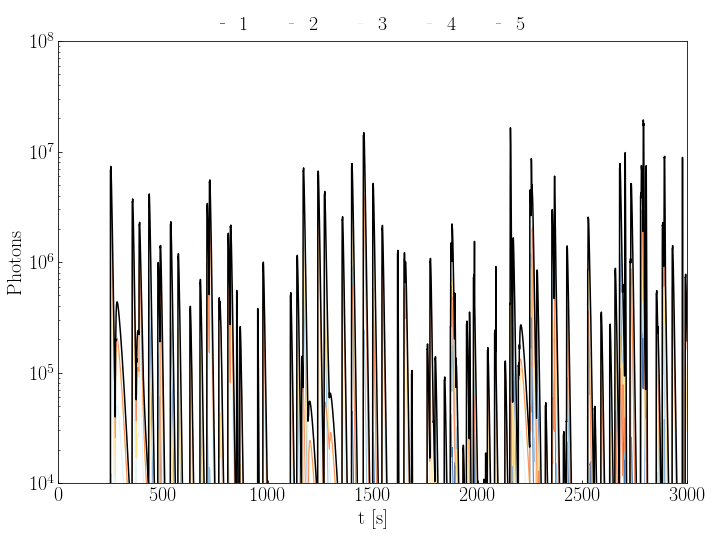

In [12]:
# ---------------------------------------------
# Detector light yields
# These are stored in fd.measured
# ---------------------------------------------
# The different detectors (each measuring different wavelengths here)
wavelengths = {
    "Detector 1": ["1", "#4575b4"],
    "Detector 5": ["2", "#91bfdb"],
    "Detector 8": ["3", "#e0f3f8"],
    "Detector 3": ["4", "#fee090"],
    "Detector 10": ["5", "#fc8d59"],
}
# ---------------------------------------------
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# Plotting the different detector values
for detector in wavelengths.keys():
    ax1.plot(fd.t,
             fd.measured[detector].values,
             lw=lw, label=r"$\mathrm{%s}$" % wavelengths[detector][0], color=wavelengths[detector][1])
# Constructing and plotting the totals
total = fd.measured["Detector 1"].values
for detector in wavelengths.keys():
    if detector == "Detector 1":
        continue
    total += fd.measured[detector].values
ax1.plot(fd.t, total, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\mathrm{t}\;[\mathrm{s}]$', fontsize=fontsize)
ax1.set_ylabel(r'$\mathrm{Photons}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
# ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                  ncol=5, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.set_ylim(1e4, 1e8)
ax1.set_xlim(0., 3000)
plt.tight_layout()
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')

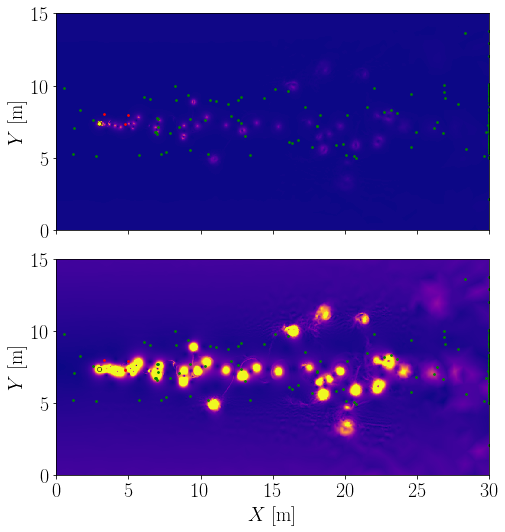

In [13]:
# ---------------------------------------------
# Creating a view plot
# This shows the water current and organisms (emitting or not)
# ---------------------------------------------
# The first view plot, this tries to show the individual vortices
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Constructing the water current grid
courseness = 1000  # The plotting precision
# The grids used for the water current plot
x_grid = np.linspace(0., config['geometry']['volume']['x_length'], courseness)
y_grid = (
    np.linspace(0., config['geometry']['volume']['y_length'], courseness) +
    config['water']['model']['off set'][1]
)
X, Y = np.meshgrid(x_grid, y_grid)
all_points = []
for i in range(0, len(x_grid)):
    all_points.append(np.vstack((X[i], Y[i])).T)
# The water current
x_vel = []
y_vel = []
grad = []
for j in range(0, len(x_grid)):
    # x_vel_tmp, y_vel_tmp, vel_abs = fd._current.velocities(all_points[j], q + config['advanced']['starting step'])
    grad_tmp = fd._current.gradients(all_points[j], 600)
    # x_vel.append(x_vel_tmp)
    # y_vel.append(y_vel_tmp)
    grad.append(grad_tmp)
grad = np.array(grad)
# ---------------------------------------------
# Creating the plots
vmax = 1.
vmin = 0.
# Water current
ax1.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 30., 0., 15.])
# The organisms
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
# Not emitting
ax1.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
# Emitting
ax1.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# ---------------------------------------------
# Visualizing the detector
# Exclusion
theta = np.linspace(0, 2*np.pi, 50)
r = config['geometry']['exclusion']['radius']  # The detector radius
x1 = r*np.cos(theta)  # The plotting circle x
x2 = r*np.sin(theta)  # The plotting circle y
# The actual detector plot
ax1.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# ---------------------------------------------
# Additional options
ax1.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(0., 30.)
ax1.set_ylim(0., 15.)
# ---------------------------------------------
# The general area where emission is likely visualized
vmax = 0.05
vmin = 0.
# Water current
ax2.imshow(grad.reshape(courseness, courseness), cmap='plasma',
           vmax=vmax, vmin=vmin, extent=[0., 30., 0., 15.])
# The organisms
emission_mask = fd.statistics[-1].loc[:, 'is_emitting']
# Not emitting
ax2.scatter(fd.statistics[-1].loc[~emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[~emission_mask, 'pos_y'].values,
            color='g',
            s=3.
)
# Emitting
ax2.scatter(fd.statistics[-1].loc[emission_mask, 'pos_x'].values,
            fd.statistics[-1].loc[emission_mask, 'pos_y'].values,
            color='r',
            s=3.
)
# ---------------------------------------------
# Exclusion
theta = np.linspace(0, 2*np.pi, 50)
r = config['geometry']['exclusion']['radius']
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)
ax2.plot(x1 + config['geometry']['exclusion']['x_pos'], x2 + config['geometry']['exclusion']['y_pos'],
         lw=lw/2, color='k')
# ---------------------------------------------
# Additional options
ax2.set_xlabel(r'$X\;[\mathrm{m}]$', fontsize=fontsize)
ax2.set_ylabel(r'$Y\;[\mathrm{m}]$', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax2.set_xlim(0., 30.)
ax2.set_ylim(0., 15.)
plt.tight_layout()
plt.show()
# ---------------------------------------------
# Storing
figure.savefig(PICS + "MC_Pop.png",
               bbox_inches='tight')